In [287]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('my_data.csv')

In [288]:
df

,Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),"Life expectancy at birth, total (years)","Population, total",Population growth (annual %),Net migration,Human Capital Index (HCI) (scale 0-1),GDP (current US$),GDP per capita (current US$),GDP growth (annual %),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)","Personal remittances, received (% of GDP)",country
0,0.1,78,1.41,0.0,"-310,220",0.7,17.96,"12,720.2",3.0,5.0,2.0,0.1,China
1,0.2,83,"38,929,902",1.8,"249,746",0.8,2.16,"55,522.4",3.8,5.4,6.8,0.0,Canada
2,12.9,67,1.42,0.7,"-486,136",0.5,3.42,"2,410.9",7.2,4.7,6.7,3.3,India
3,1.2,70,"127,504,125",0.6,"-50,239",0.6,1.47,"11,496.5",3.9,2.8,7.9,4.2,Mexico
4,0.2,76,"333,287,557",0.4,"999,700",0.7,25.44,"76,329.6",1.9,3.6,8.0,0.0,United States
5,0.0,82,"5,556,106",0.3,"13,999",0.8,282.65,"50,871.9",1.6,7.0,7.1,0.2,Finland
6,0.6,75,"46,234,830",0.9,"3,718",0.6,631.13,"13,650.6",5.0,6.8,0.2,3.4,Argentina
7,0.1,81,"17,700,982",1.0,"29,998",0.8,1.01,"57,025.0",4.3,3.5,10.0,0.2,Netherlands
8,4.9,66,"235,824,862",1.9,"-165,988",0.4,374.70,"1,588.9",4.7,5.7,19.9,8.1,Pakistan
9,0.5,83,"26,005,540",1.2,"139,991",0.8,1.69,"65,099.8",4.3,3.6,6.6,0.1,Australia


Lets Clean the data first
- convert value to int or float
- shorten the header names
- make sure all numbers are in the same format
- shift the country column over

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 13 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)  11 non-null     float64
 1   Life expectancy at birth, total (years)                              11 non-null     int64  
 2   Population, total                                                    11 non-null     object 
 3   Population growth (annual %)                                         11 non-null     float64
 4   Net migration                                                        11 non-null     object 
 5   Human Capital Index (HCI) (scale 0-1)                                11 non-null     float64
 6   GDP (current US$)                                                    11 non-null     float64
 7   GDP per ca

In [290]:

##REMOVE THE COMMAS AND CONVERT DATA TYPES
def remove_commas_and_convert(cell_value):
    if isinstance(cell_value, str) and ',' in cell_value:
        return int(cell_value.replace(',', ''))
    else:
        return cell_value

df['Population, total'] = df['Population, total'].apply(remove_commas_and_convert)
df['Net migration'] = df['Net migration'].apply(remove_commas_and_convert)
# GDP PER CAPITA IS A FLOAT VALUE WITH COMMAS SO I HAVE TO REMOVE THAT DIFFERENTLY
df['GDP per capita (current US$)'] = df['GDP per capita (current US$)'].apply(lambda x: float(x.replace(',', '')))
df

,Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),"Life expectancy at birth, total (years)","Population, total",Population growth (annual %),Net migration,Human Capital Index (HCI) (scale 0-1),GDP (current US$),GDP per capita (current US$),GDP growth (annual %),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)","Personal remittances, received (% of GDP)",country
0,0.1,78,1.41,0.0,-310220,0.7,17.96,12720.2,3.0,5.0,2.0,0.1,China
1,0.2,83,38929902,1.8,249746,0.8,2.16,55522.4,3.8,5.4,6.8,0.0,Canada
2,12.9,67,1.42,0.7,-486136,0.5,3.42,2410.9,7.2,4.7,6.7,3.3,India
3,1.2,70,127504125,0.6,-50239,0.6,1.47,11496.5,3.9,2.8,7.9,4.2,Mexico
4,0.2,76,333287557,0.4,999700,0.7,25.44,76329.6,1.9,3.6,8.0,0.0,United States
5,0.0,82,5556106,0.3,13999,0.8,282.65,50871.9,1.6,7.0,7.1,0.2,Finland
6,0.6,75,46234830,0.9,3718,0.6,631.13,13650.6,5.0,6.8,0.2,3.4,Argentina
7,0.1,81,17700982,1.0,29998,0.8,1.01,57025.0,4.3,3.5,10.0,0.2,Netherlands
8,4.9,66,235824862,1.9,-165988,0.4,374.70,1588.9,4.7,5.7,19.9,8.1,Pakistan
9,0.5,83,26005540,1.2,139991,0.8,1.69,65099.8,4.3,3.6,6.6,0.1,Australia


In [291]:
# CONVERT THE FLOAT VALUES IN POPULATION TOTAL INTO THE BILLIONS 
pattern = r'^\d+\.\d{2}$'
filtered_cells = df['Population, total'].str.match(pattern)
notna_mask = pd.notna(df['Population, total'])
df.loc[notna_mask & filtered_cells, 'Population, total'] = (df.loc[notna_mask & filtered_cells, 'Population, total'].astype(float) * 1000000000).round()
print("Updated DataFrame:")
df

Updated DataFrame:


,Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),"Life expectancy at birth, total (years)","Population, total",Population growth (annual %),Net migration,Human Capital Index (HCI) (scale 0-1),GDP (current US$),GDP per capita (current US$),GDP growth (annual %),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)","Personal remittances, received (% of GDP)",country
0,0.1,78,1410000000.0,0.0,-310220,0.7,17.96,12720.2,3.0,5.0,2.0,0.1,China
1,0.2,83,38929902,1.8,249746,0.8,2.16,55522.4,3.8,5.4,6.8,0.0,Canada
2,12.9,67,1420000000.0,0.7,-486136,0.5,3.42,2410.9,7.2,4.7,6.7,3.3,India
3,1.2,70,127504125,0.6,-50239,0.6,1.47,11496.5,3.9,2.8,7.9,4.2,Mexico
4,0.2,76,333287557,0.4,999700,0.7,25.44,76329.6,1.9,3.6,8.0,0.0,United States
5,0.0,82,5556106,0.3,13999,0.8,282.65,50871.9,1.6,7.0,7.1,0.2,Finland
6,0.6,75,46234830,0.9,3718,0.6,631.13,13650.6,5.0,6.8,0.2,3.4,Argentina
7,0.1,81,17700982,1.0,29998,0.8,1.01,57025.0,4.3,3.5,10.0,0.2,Netherlands
8,4.9,66,235824862,1.9,-165988,0.4,374.70,1588.9,4.7,5.7,19.9,8.1,Pakistan
9,0.5,83,26005540,1.2,139991,0.8,1.69,65099.8,4.3,3.6,6.6,0.1,Australia


In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 13 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)  11 non-null     float64
 1   Life expectancy at birth, total (years)                              11 non-null     int64  
 2   Population, total                                                    11 non-null     object 
 3   Population growth (annual %)                                         11 non-null     float64
 4   Net migration                                                        11 non-null     int64  
 5   Human Capital Index (HCI) (scale 0-1)                                11 non-null     float64
 6   GDP (current US$)                                                    11 non-null     float64
 7   GDP per ca

In [293]:
#RENAMING THE HEADERS (TOO LONG)
df = df.rename(columns={'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)': 'Poverty Ratio at $2.15/day (%)', 
                    'Life expectancy at birth, total (years)': 'Life Span (Years)',
                    'Human Capital Index (HCI) (scale 0-1)': 'HCI (Scale: 0-1)',
                    'Unemployment, total (% of total labor force) (modeled ILO estimate)': 'Unemployment (%)',
                    'Inflation, consumer prices (annual %)': 'Inflation (annual %)',
                    'Personal remittances, received (% of GDP)': 'Personal remittances (% of GDP)',
                    'Population, total': 'Population',
                    'country': 'Country',
                    'Net migration': 'Net Migration'})
df

,Poverty Ratio at $2.15/day (%),Life Span (Years),Population,Population growth (annual %),Net Migration,HCI (Scale: 0-1),GDP (current US$),GDP per capita (current US$),GDP growth (annual %),Unemployment (%),Inflation (annual %),Personal remittances (% of GDP),Country
0,0.1,78,1410000000.0,0.0,-310220,0.7,17.96,12720.2,3.0,5.0,2.0,0.1,China
1,0.2,83,38929902,1.8,249746,0.8,2.16,55522.4,3.8,5.4,6.8,0.0,Canada
2,12.9,67,1420000000.0,0.7,-486136,0.5,3.42,2410.9,7.2,4.7,6.7,3.3,India
3,1.2,70,127504125,0.6,-50239,0.6,1.47,11496.5,3.9,2.8,7.9,4.2,Mexico
4,0.2,76,333287557,0.4,999700,0.7,25.44,76329.6,1.9,3.6,8.0,0.0,United States
5,0.0,82,5556106,0.3,13999,0.8,282.65,50871.9,1.6,7.0,7.1,0.2,Finland
6,0.6,75,46234830,0.9,3718,0.6,631.13,13650.6,5.0,6.8,0.2,3.4,Argentina
7,0.1,81,17700982,1.0,29998,0.8,1.01,57025.0,4.3,3.5,10.0,0.2,Netherlands
8,4.9,66,235824862,1.9,-165988,0.4,374.70,1588.9,4.7,5.7,19.9,8.1,Pakistan
9,0.5,83,26005540,1.2,139991,0.8,1.69,65099.8,4.3,3.6,6.6,0.1,Australia


In [294]:
#MOVE COUNTRY COLUMN TO FIRST POSITION
column_to_shift = 'Country'
columns_ordered = list(df.columns.drop(column_to_shift)) + [column_to_shift]
df = df.reindex(columns=columns_ordered)
df

,Poverty Ratio at $2.15/day (%),Life Span (Years),Population,Population growth (annual %),Net Migration,HCI (Scale: 0-1),GDP (current US$),GDP per capita (current US$),GDP growth (annual %),Unemployment (%),Inflation (annual %),Personal remittances (% of GDP),Country
0,0.1,78,1410000000.0,0.0,-310220,0.7,17.96,12720.2,3.0,5.0,2.0,0.1,China
1,0.2,83,38929902,1.8,249746,0.8,2.16,55522.4,3.8,5.4,6.8,0.0,Canada
2,12.9,67,1420000000.0,0.7,-486136,0.5,3.42,2410.9,7.2,4.7,6.7,3.3,India
3,1.2,70,127504125,0.6,-50239,0.6,1.47,11496.5,3.9,2.8,7.9,4.2,Mexico
4,0.2,76,333287557,0.4,999700,0.7,25.44,76329.6,1.9,3.6,8.0,0.0,United States
5,0.0,82,5556106,0.3,13999,0.8,282.65,50871.9,1.6,7.0,7.1,0.2,Finland
6,0.6,75,46234830,0.9,3718,0.6,631.13,13650.6,5.0,6.8,0.2,3.4,Argentina
7,0.1,81,17700982,1.0,29998,0.8,1.01,57025.0,4.3,3.5,10.0,0.2,Netherlands
8,4.9,66,235824862,1.9,-165988,0.4,374.70,1588.9,4.7,5.7,19.9,8.1,Pakistan
9,0.5,83,26005540,1.2,139991,0.8,1.69,65099.8,4.3,3.6,6.6,0.1,Australia


In [295]:
column_to_move = df.pop('Country')
df.insert(0, 'Country', column_to_move)
df

,Country,Poverty Ratio at $2.15/day (%),Life Span (Years),Population,Population growth (annual %),Net Migration,HCI (Scale: 0-1),GDP (current US$),GDP per capita (current US$),GDP growth (annual %),Unemployment (%),Inflation (annual %),Personal remittances (% of GDP)
0,China,0.1,78,1410000000.0,0.0,-310220,0.7,17.96,12720.2,3.0,5.0,2.0,0.1
1,Canada,0.2,83,38929902,1.8,249746,0.8,2.16,55522.4,3.8,5.4,6.8,0.0
2,India,12.9,67,1420000000.0,0.7,-486136,0.5,3.42,2410.9,7.2,4.7,6.7,3.3
3,Mexico,1.2,70,127504125,0.6,-50239,0.6,1.47,11496.5,3.9,2.8,7.9,4.2
4,United States,0.2,76,333287557,0.4,999700,0.7,25.44,76329.6,1.9,3.6,8.0,0.0
5,Finland,0.0,82,5556106,0.3,13999,0.8,282.65,50871.9,1.6,7.0,7.1,0.2
6,Argentina,0.6,75,46234830,0.9,3718,0.6,631.13,13650.6,5.0,6.8,0.2,3.4
7,Netherlands,0.1,81,17700982,1.0,29998,0.8,1.01,57025.0,4.3,3.5,10.0,0.2
8,Pakistan,4.9,66,235824862,1.9,-165988,0.4,374.70,1588.9,4.7,5.7,19.9,8.1
9,Australia,0.5,83,26005540,1.2,139991,0.8,1.69,65099.8,4.3,3.6,6.6,0.1


In [296]:
df2 = df.copy()

In [297]:
df2

,Country,Poverty Ratio at $2.15/day (%),Life Span (Years),Population,Population growth (annual %),Net Migration,HCI (Scale: 0-1),GDP (current US$),GDP per capita (current US$),GDP growth (annual %),Unemployment (%),Inflation (annual %),Personal remittances (% of GDP)
0,China,0.1,78,1410000000.0,0.0,-310220,0.7,17.96,12720.2,3.0,5.0,2.0,0.1
1,Canada,0.2,83,38929902,1.8,249746,0.8,2.16,55522.4,3.8,5.4,6.8,0.0
2,India,12.9,67,1420000000.0,0.7,-486136,0.5,3.42,2410.9,7.2,4.7,6.7,3.3
3,Mexico,1.2,70,127504125,0.6,-50239,0.6,1.47,11496.5,3.9,2.8,7.9,4.2
4,United States,0.2,76,333287557,0.4,999700,0.7,25.44,76329.6,1.9,3.6,8.0,0.0
5,Finland,0.0,82,5556106,0.3,13999,0.8,282.65,50871.9,1.6,7.0,7.1,0.2
6,Argentina,0.6,75,46234830,0.9,3718,0.6,631.13,13650.6,5.0,6.8,0.2,3.4
7,Netherlands,0.1,81,17700982,1.0,29998,0.8,1.01,57025.0,4.3,3.5,10.0,0.2
8,Pakistan,4.9,66,235824862,1.9,-165988,0.4,374.70,1588.9,4.7,5.7,19.9,8.1
9,Australia,0.5,83,26005540,1.2,139991,0.8,1.69,65099.8,4.3,3.6,6.6,0.1


DATA CLEANING COMPLETE

EDA/ ANSWER QUESTION

- How does the poverty ratio at $2.15 a day relate to GDP per capita?

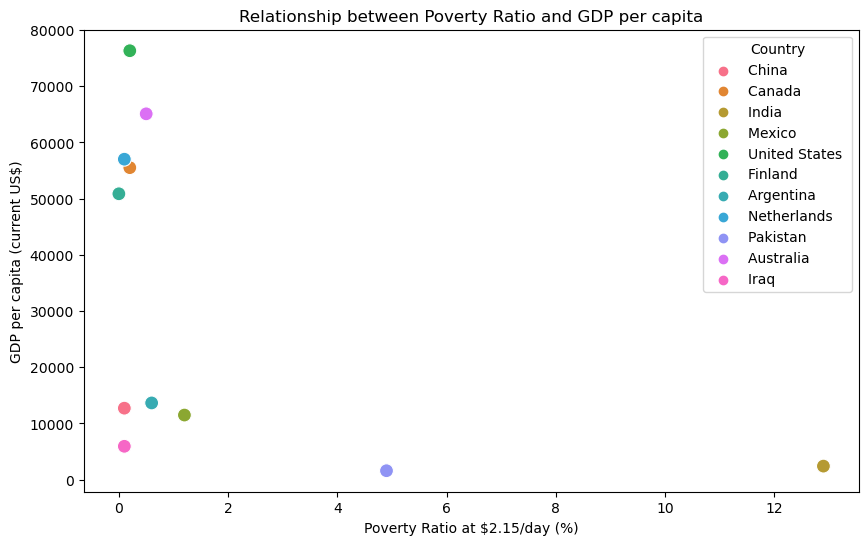

In [298]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='Poverty Ratio at $2.15/day (%)', y='GDP per capita (current US$)', hue='Country', s =100)
plt.title('Relationship between Poverty Ratio and GDP per capita')
plt.xlabel('Poverty Ratio at $2.15/day (%)')
plt.ylabel('GDP per capita (current US$)')
plt.legend(title='Country', bbox_to_anchor=(1, 1))
plt.show()


GDP and GDP per Capita:
How does GDP (current US$) compare to GDP per capita (current US$) across different countries?
Is there a correlation between GDP growth rates and changes in GDP per capita?

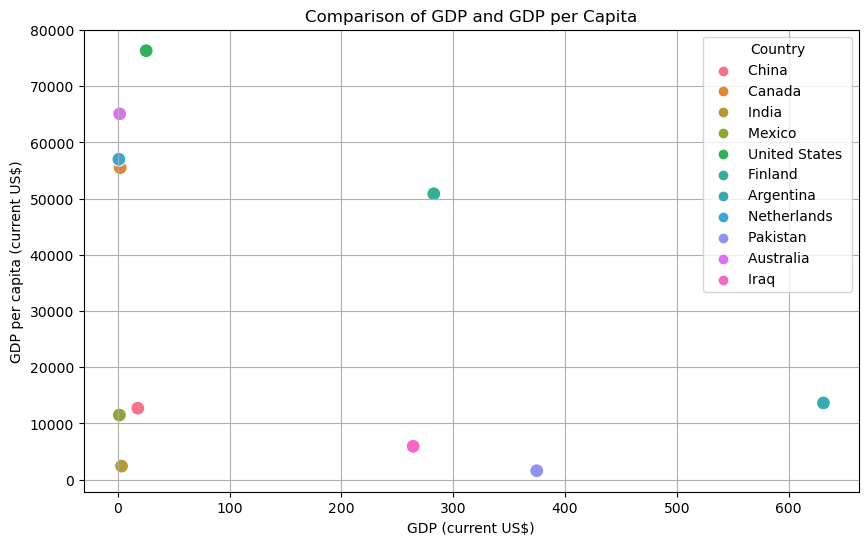

In [299]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='GDP (current US$)', y='GDP per capita (current US$)', hue='Country', s = 100)
plt.title('Comparison of GDP and GDP per Capita')
plt.xlabel('GDP (current US$)')
plt.ylabel('GDP per capita (current US$)')
plt.legend(title='Country', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


QUESTION: How does the Net Migration Rate effect HCI?

In [300]:
df2['Net Migration Rate (%)'] = ((df2['Net Migration'] / df2['Population']) * 100).apply(lambda x: round(x, 2))

df2

,Country,Poverty Ratio at $2.15/day (%),Life Span (Years),Population,Population growth (annual %),Net Migration,HCI (Scale: 0-1),GDP (current US$),GDP per capita (current US$),GDP growth (annual %),Unemployment (%),Inflation (annual %),Personal remittances (% of GDP),Net Migration Rate (%)
0,China,0.1,78,1410000000.0,0.0,-310220,0.7,17.96,12720.2,3.0,5.0,2.0,0.1,-0.02
1,Canada,0.2,83,38929902,1.8,249746,0.8,2.16,55522.4,3.8,5.4,6.8,0.0,0.64
2,India,12.9,67,1420000000.0,0.7,-486136,0.5,3.42,2410.9,7.2,4.7,6.7,3.3,-0.03
3,Mexico,1.2,70,127504125,0.6,-50239,0.6,1.47,11496.5,3.9,2.8,7.9,4.2,-0.04
4,United States,0.2,76,333287557,0.4,999700,0.7,25.44,76329.6,1.9,3.6,8.0,0.0,0.30
5,Finland,0.0,82,5556106,0.3,13999,0.8,282.65,50871.9,1.6,7.0,7.1,0.2,0.25
6,Argentina,0.6,75,46234830,0.9,3718,0.6,631.13,13650.6,5.0,6.8,0.2,3.4,0.01
7,Netherlands,0.1,81,17700982,1.0,29998,0.8,1.01,57025.0,4.3,3.5,10.0,0.2,0.17
8,Pakistan,4.9,66,235824862,1.9,-165988,0.4,374.70,1588.9,4.7,5.7,19.9,8.1,-0.07
9,Australia,0.5,83,26005540,1.2,139991,0.8,1.69,65099.8,4.3,3.6,6.6,0.1,0.54


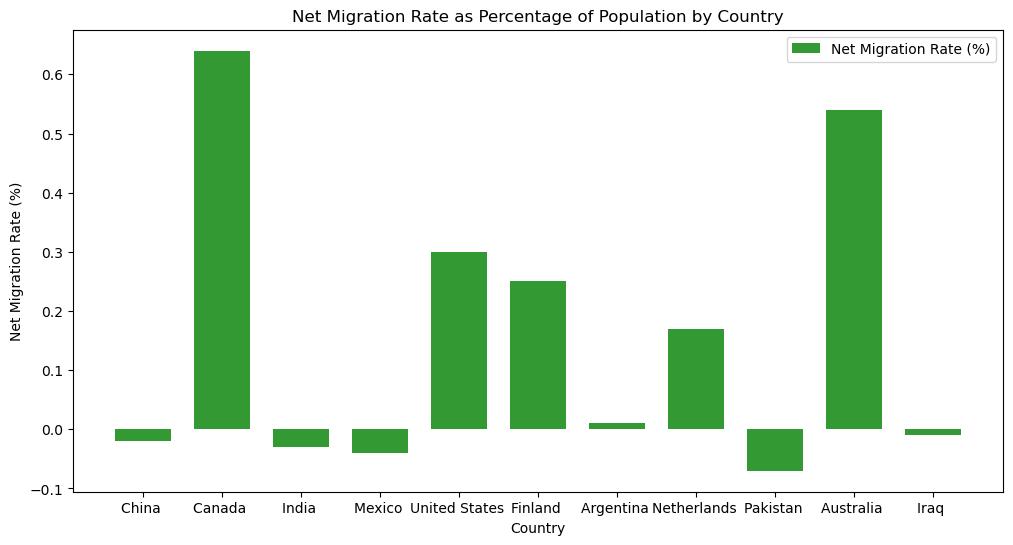

In [301]:
plt.figure(figsize=(12, 6))
positions = range(len(df2['Country']))
plt.bar(positions, df2['Net Migration Rate (%)'], color='green', width=0.7, alpha=0.8, label='Net Migration Rate (%)')
plt.xlabel('Country')
plt.ylabel('Net Migration Rate (%)')
plt.title('Net Migration Rate as Percentage of Population by Country')
plt.xticks(positions, df2['Country'])
plt.legend()

plt.show()

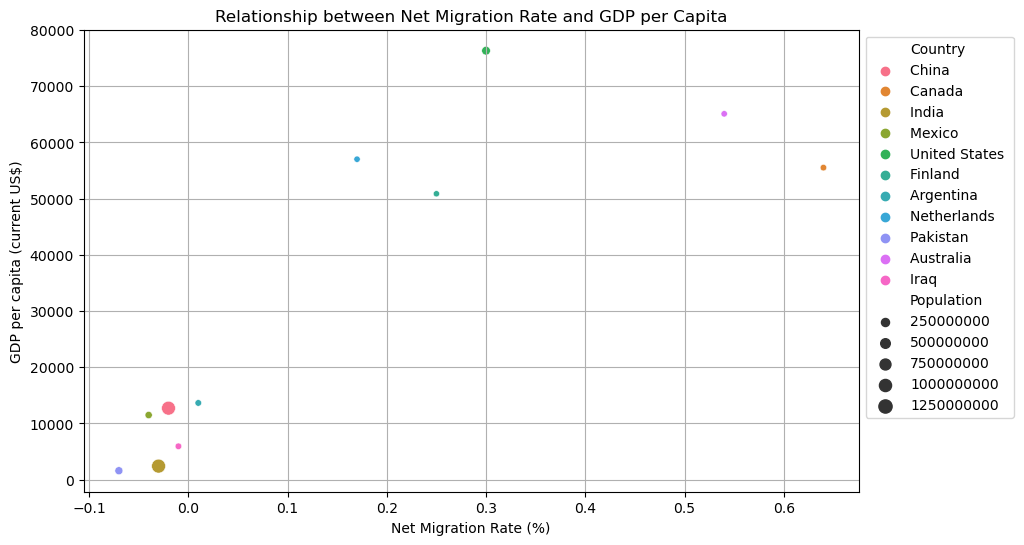

In [302]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='Net Migration Rate (%)', y='GDP per capita (current US$)', hue='Country', size='Population', sizes=(20, 100))
plt.title('Relationship between Net Migration Rate and GDP per Capita')
plt.xlabel('Net Migration Rate (%)')
plt.ylabel('GDP per capita (current US$)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

Human Capital Index(HCI) VS Life Span in realtion to the population

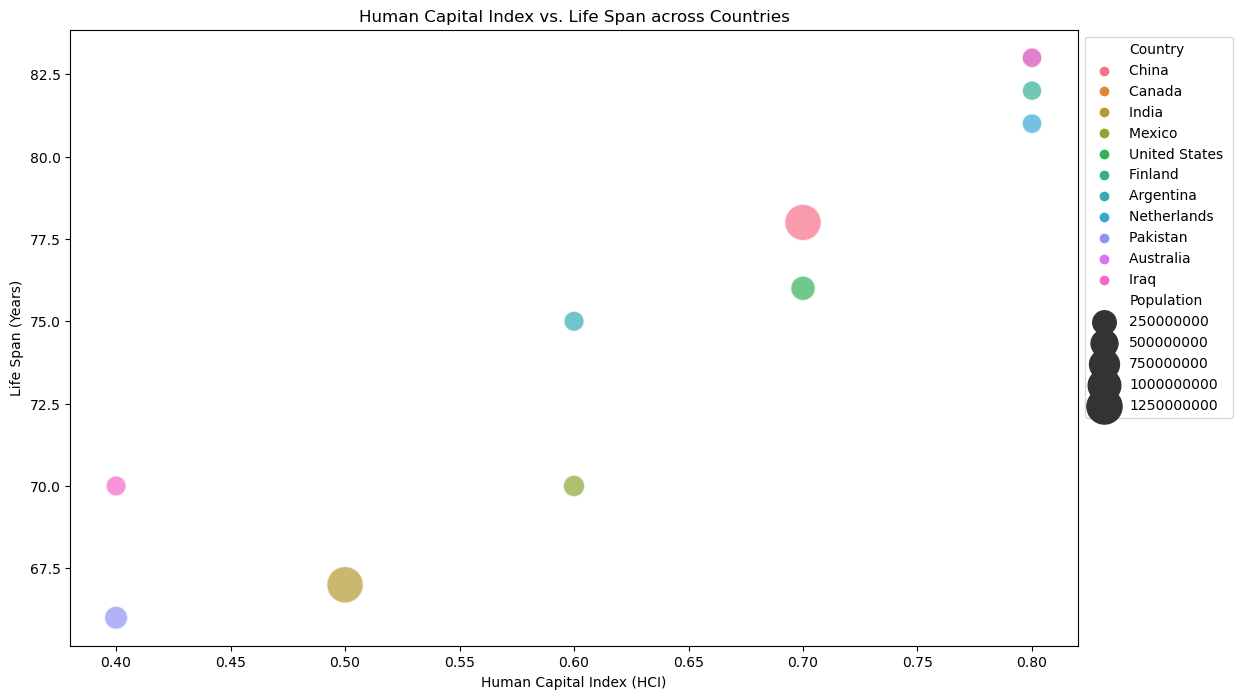

In [303]:
plt.figure(figsize=(13, 8))
bubble = sns.scatterplot(data=df2, x='HCI (Scale: 0-1)', y='Life Span (Years)', size='Population',
                         sizes=(200, 700), hue='Country', alpha=0.7)
plt.title('Human Capital Index vs. Life Span across Countries')
plt.xlabel('Human Capital Index (HCI)')
plt.ylabel('Life Span (Years)')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [304]:
df2

,Country,Poverty Ratio at $2.15/day (%),Life Span (Years),Population,Population growth (annual %),Net Migration,HCI (Scale: 0-1),GDP (current US$),GDP per capita (current US$),GDP growth (annual %),Unemployment (%),Inflation (annual %),Personal remittances (% of GDP),Net Migration Rate (%)
0,China,0.1,78,1410000000.0,0.0,-310220,0.7,17.96,12720.2,3.0,5.0,2.0,0.1,-0.02
1,Canada,0.2,83,38929902,1.8,249746,0.8,2.16,55522.4,3.8,5.4,6.8,0.0,0.64
2,India,12.9,67,1420000000.0,0.7,-486136,0.5,3.42,2410.9,7.2,4.7,6.7,3.3,-0.03
3,Mexico,1.2,70,127504125,0.6,-50239,0.6,1.47,11496.5,3.9,2.8,7.9,4.2,-0.04
4,United States,0.2,76,333287557,0.4,999700,0.7,25.44,76329.6,1.9,3.6,8.0,0.0,0.30
5,Finland,0.0,82,5556106,0.3,13999,0.8,282.65,50871.9,1.6,7.0,7.1,0.2,0.25
6,Argentina,0.6,75,46234830,0.9,3718,0.6,631.13,13650.6,5.0,6.8,0.2,3.4,0.01
7,Netherlands,0.1,81,17700982,1.0,29998,0.8,1.01,57025.0,4.3,3.5,10.0,0.2,0.17
8,Pakistan,4.9,66,235824862,1.9,-165988,0.4,374.70,1588.9,4.7,5.7,19.9,8.1,-0.07
9,Australia,0.5,83,26005540,1.2,139991,0.8,1.69,65099.8,4.3,3.6,6.6,0.1,0.54


Which country has the greatest population to unemployemnt rate ratio 

In [ ]:
df_pop = pd.DataFrame()
df_pop['Umemploy amount'] = (df2['Population'] * (df2['Unemployment (%)']/100))
df_pop['Country'] = df2['Country']
df_pop

,Umemploy amount,Country
0,70500000.0,China
1,2102214.708,Canada
2,66740000.0,India
3,3570115.5,Mexico
4,11998352.052,United States
5,388927.42,Finland
6,3143968.44,Argentina
7,619534.37,Netherlands
8,13442017.134,Pakistan
9,936199.44,Australia


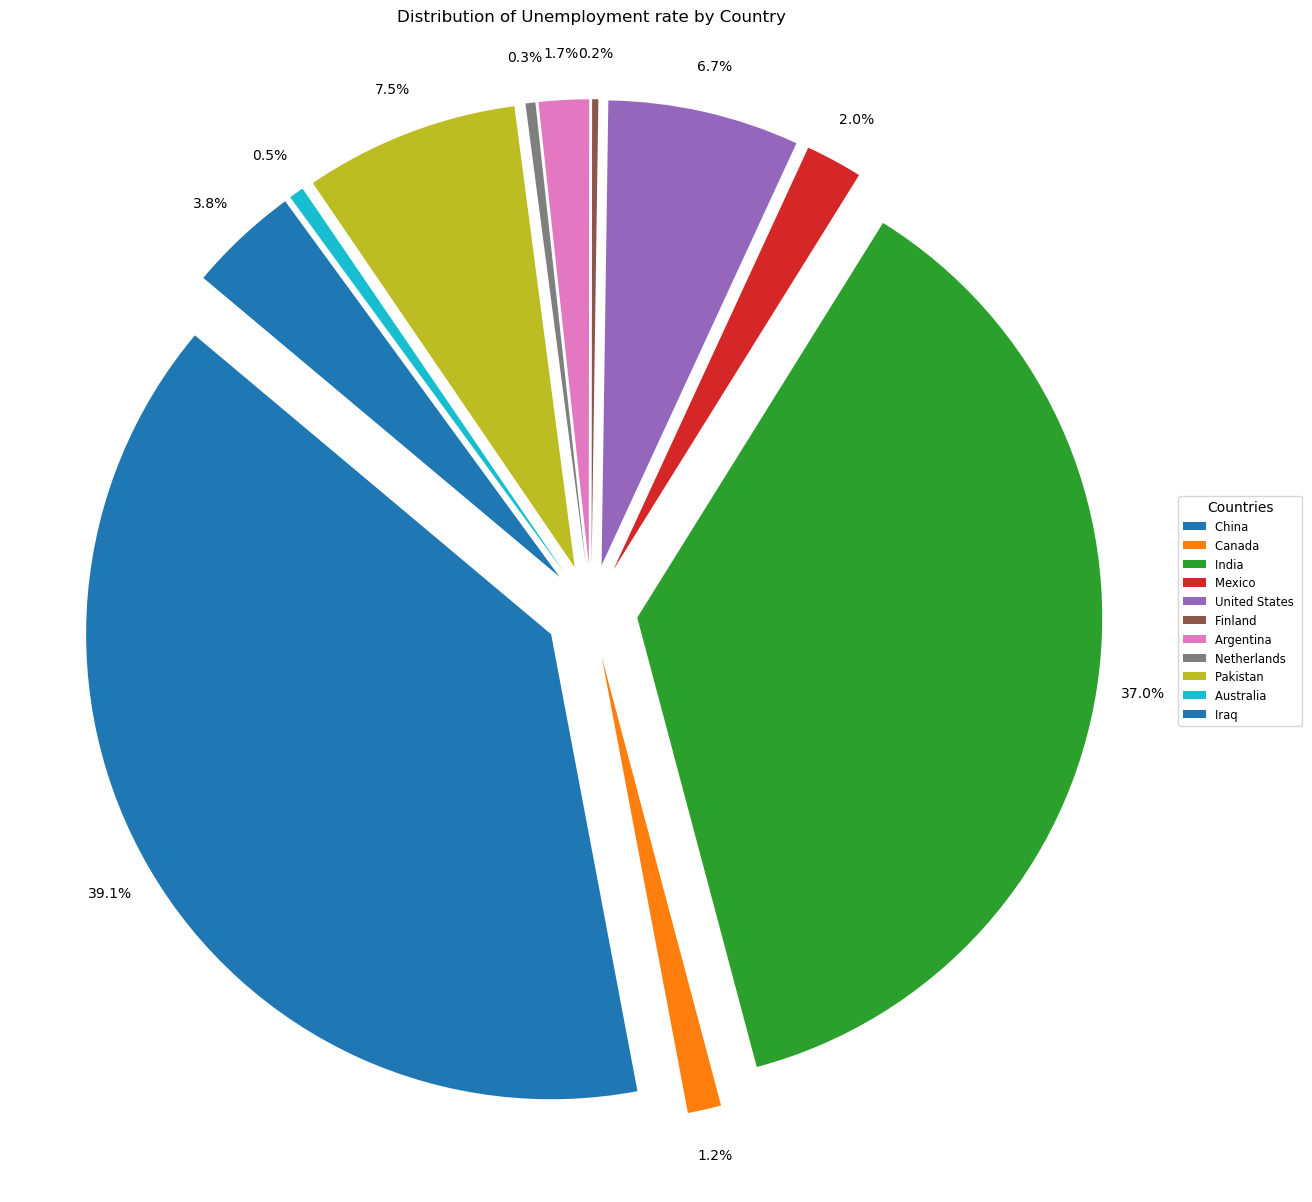

In [378]:
Unemploy_ratios = df_pop['Umemploy amount']
countries = df_pop['Country']
plt.figure(figsize=(15,20 ))
plt.pie(Unemploy_ratios, labels=None, autopct='%1.1f%%', startangle=140, pctdistance=1.1, labeldistance= 1.2, explode =explode)
plt.title('Distribution of Unemployment rate by Country')
plt.gca().set_aspect('equal')
plt.legend(countries, loc='center left', bbox_to_anchor=(1, 0.5), title='Countries', fontsize='small')
plt.show()

In [ ]:
df2

,Country,Poverty Ratio at $2.15/day (%),Life Span (Years),Population,Population growth (annual %),Net Migration,HCI (Scale: 0-1),GDP (current US$),GDP per capita (current US$),GDP growth (annual %),Unemployment (%),Inflation (annual %),Personal remittances (% of GDP),Net Migration Rate (%)
0,China,0.1,78,1410000000.0,0.0,-310220,0.7,17.96,12720.2,3.0,5.0,2.0,0.1,-0.02
1,Canada,0.2,83,38929902,1.8,249746,0.8,2.16,55522.4,3.8,5.4,6.8,0.0,0.64
2,India,12.9,67,1420000000.0,0.7,-486136,0.5,3.42,2410.9,7.2,4.7,6.7,3.3,-0.03
3,Mexico,1.2,70,127504125,0.6,-50239,0.6,1.47,11496.5,3.9,2.8,7.9,4.2,-0.04
4,United States,0.2,76,333287557,0.4,999700,0.7,25.44,76329.6,1.9,3.6,8.0,0.0,0.30
5,Finland,0.0,82,5556106,0.3,13999,0.8,282.65,50871.9,1.6,7.0,7.1,0.2,0.25
6,Argentina,0.6,75,46234830,0.9,3718,0.6,631.13,13650.6,5.0,6.8,0.2,3.4,0.01
7,Netherlands,0.1,81,17700982,1.0,29998,0.8,1.01,57025.0,4.3,3.5,10.0,0.2,0.17
8,Pakistan,4.9,66,235824862,1.9,-165988,0.4,374.70,1588.9,4.7,5.7,19.9,8.1,-0.07
9,Australia,0.5,83,26005540,1.2,139991,0.8,1.69,65099.8,4.3,3.6,6.6,0.1,0.54
